In [125]:
#importing libraries
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [126]:
#Reading in data
train = pd.read_csv("C:/Users/Aditya/Downloads/AVLoanApp/train.csv", delimiter = ",")
test = pd.read_csv("C:/Users/Aditya/Downloads/AVLoanApp/test.csv", delimiter = ",")

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [127]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [109]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

# Data visualisation

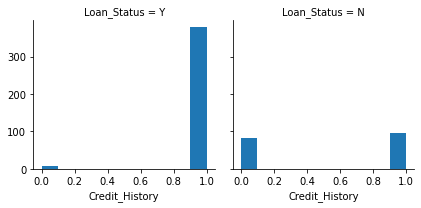

In [92]:
g = sns.FacetGrid(train, col='Loan_Status')
g.map(plt.hist, 'Credit_History')

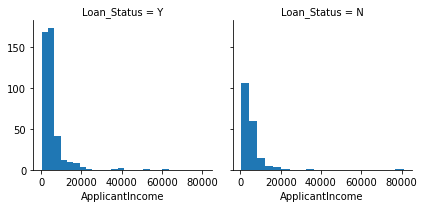

In [93]:
g = sns.FacetGrid(train, col='Loan_Status')
g.map(plt.hist, 'ApplicantIncome', bins=20)

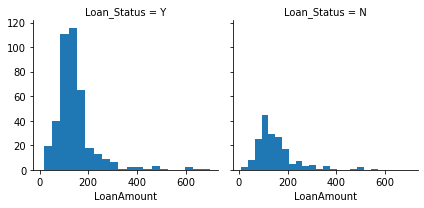

In [94]:
g = sns.FacetGrid(train, col='Loan_Status')
g.map(plt.hist, 'LoanAmount', bins=20)

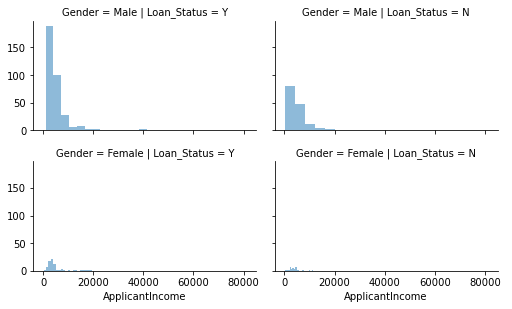

In [95]:
grid = sns.FacetGrid(train, col='Loan_Status', row='Gender', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=20)
grid.add_legend();

# Data wrangling
Null values wherever they are above 15% of total data,respective columns are dropped since imputing large data is counter productive and changes nature of given data. Label encoding is also carried out

In [96]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [97]:
#missing data
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_datatest = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_datatest.head(20)

,Total,Percent
Credit_History,29,0.079019
Self_Employed,23,0.062670
Gender,11,0.029973
Dependents,10,0.027248
Loan_Amount_Term,6,0.016349
LoanAmount,5,0.013624
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000
Education,0,0.000000


In [128]:
catfeats_fillnamode = \
    ['Gender','Married', 'Dependents',
    'Self_Employed', 'Credit_History','Loan_Amount_Term']
train.loc[:, catfeats_fillnamode] = \
    train[catfeats_fillnamode].fillna(train[catfeats_fillnamode].mode().iloc[0])

catfeats_fillnamode1 = \
    ['Gender','Dependents',
    'Self_Employed', 'Credit_History','Loan_Amount_Term']
test.loc[:, catfeats_fillnamode1] = \
    test[catfeats_fillnamode1].fillna(test[catfeats_fillnamode1].mode().iloc[0])

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)

train = train.drop(["Loan_ID"],axis=1)
test1 = test.drop(["Loan_ID"],axis=1)

train.info()
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  --

In [129]:
s = (train.dtypes == 'object')
r = (test1.dtypes == 'object')
object_cols = list(s[s].index)
object_cols = list(r[r].index)
label_encoder = LabelEncoder()
for col in object_cols:
    train[col] = label_encoder.fit_transform(train[col])
    test1[col] = label_encoder.fit_transform(test1[col])
    
train.info()
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype

In [130]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


# Building model

In [131]:
X = train.drop(["Loan_Status"],axis=1)
Y = train['Loan_Status']
X1 = test1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [132]:
FC_DT = DecisionTreeClassifier(criterion="gini")
FC_DT.fit(X_train,Y_train)
predTree = FC_DT.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.7642276422764228


In [133]:
FC_RFC = RandomForestClassifier(bootstrap=True,
                       criterion='gini',  random_state=42)
FC_RFC.fit(X_train,Y_train)
preds = FC_RFC.predict(X_test)
print("Random forest's Accuracy: ", metrics.accuracy_score(Y_test, preds))


Random forest's Accuracy:  0.8455284552845529


In [134]:
from xgboost import XGBClassifier
XGBCLF_FC= XGBClassifier(n_estimators=638, max_depth= 12, 
              learning_rate= 0.06986187424232035, 
              subsample= 0.7016923037926136, 
              colsample_bytree= 0.6073327349777131,gamma=0)
XGBCLF_FC.fit(X_train,Y_train)
y_pred = XGBCLF_FC.predict(X_test)

print("XG Boost's Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

XG Boost's Accuracy:  0.7967479674796748


In [135]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train,Y_train)
Predsl = model_lgb.predict(X_test)
print("LGBM's Accuracy: ", metrics.accuracy_score(Y_test, Predsl))

LGBM's Accuracy:  0.7967479674796748


In [136]:
GBoost = GradientBoostingClassifier()
GBoost.fit(X_train,Y_train)
Predcsl = GBoost.predict(X_test)
print("GBM's Accuracy: ", metrics.accuracy_score(Y_test, Predcsl))

GBM's Accuracy:  0.8048780487804879


In [163]:
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
ext = ExtraTreesClassifier(n_estimators = 1000,max_depth = 17,min_samples_split = 25,min_samples_leaf = 18,n_jobs = -1,random_state = 42)
ext.fit(X_train,Y_train)
predext = ext.predict(X_test)
print("ETC's Accuracy: ", metrics.accuracy_score(Y_test, predext))


ETC's Accuracy:  0.8617886178861789


In [164]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()
CBC.fit(X_train,Y_train)
predCBC = CBC.predict(X_test)
print("CBC's Accuracy: ", metrics.accuracy_score(Y_test, predCBC))


Learning rate set to 0.007604
0:	learn: 0.6890047	total: 2.42ms	remaining: 2.42s
1:	learn: 0.6853147	total: 4.28ms	remaining: 2.14s
2:	learn: 0.6818388	total: 5.74ms	remaining: 1.91s
3:	learn: 0.6784038	total: 7.66ms	remaining: 1.91s
4:	learn: 0.6746478	total: 9.62ms	remaining: 1.91s
5:	learn: 0.6708820	total: 11.5ms	remaining: 1.91s
6:	learn: 0.6675154	total: 13.5ms	remaining: 1.91s
7:	learn: 0.6642826	total: 15.3ms	remaining: 1.9s
8:	learn: 0.6612390	total: 16.5ms	remaining: 1.82s
9:	learn: 0.6573180	total: 18.4ms	remaining: 1.82s
10:	learn: 0.6542411	total: 20.2ms	remaining: 1.81s
11:	learn: 0.6507895	total: 22.3ms	remaining: 1.83s
12:	learn: 0.6476318	total: 24.2ms	remaining: 1.83s
13:	learn: 0.6445284	total: 26ms	remaining: 1.83s
14:	learn: 0.6418109	total: 27.1ms	remaining: 1.78s
15:	learn: 0.6388173	total: 28.9ms	remaining: 1.77s
16:	learn: 0.6362425	total: 30.3ms	remaining: 1.75s
17:	learn: 0.6333504	total: 32.1ms	remaining: 1.75s
18:	learn: 0.6302611	total: 33.9ms	remaining: 1

Using a voting classifier with Random forest, Extra trees clasifier and Catboost 

In [165]:
FC_RFC = RandomForestClassifier(bootstrap=True,
                       criterion='gini',  random_state=42)
ext = ExtraTreesClassifier(n_estimators = 1000,max_depth = 17,min_samples_split = 25,min_samples_leaf = 18,n_jobs = -1,random_state = 42)
CBC = CatBoostClassifier()

In [166]:
Vclf = VotingClassifier(estimators=[('RFC',FC_RFC),('EXT',ext),('CBC' , CBC)], voting='soft')
Vclf.fit(X_train,Y_train)
predVclf = Vclf.predict(X_test)
print("VCLF's Accuracy: ", metrics.accuracy_score(Y_test, predVclf))

Learning rate set to 0.007604
0:	learn: 0.6890047	total: 6.73ms	remaining: 6.72s
1:	learn: 0.6853147	total: 12.3ms	remaining: 6.14s
2:	learn: 0.6818388	total: 16.6ms	remaining: 5.51s
3:	learn: 0.6784038	total: 20.6ms	remaining: 5.12s
4:	learn: 0.6746478	total: 23.4ms	remaining: 4.65s
5:	learn: 0.6708820	total: 26.2ms	remaining: 4.34s
6:	learn: 0.6675154	total: 29ms	remaining: 4.11s
7:	learn: 0.6642826	total: 31.7ms	remaining: 3.94s
8:	learn: 0.6612390	total: 33.3ms	remaining: 3.67s
9:	learn: 0.6573180	total: 36.1ms	remaining: 3.57s
10:	learn: 0.6542411	total: 38.9ms	remaining: 3.49s
11:	learn: 0.6507895	total: 41.7ms	remaining: 3.44s
12:	learn: 0.6476318	total: 44.5ms	remaining: 3.38s
13:	learn: 0.6445284	total: 47.1ms	remaining: 3.31s
14:	learn: 0.6418109	total: 48.1ms	remaining: 3.16s
15:	learn: 0.6388173	total: 50ms	remaining: 3.07s
16:	learn: 0.6362425	total: 51.5ms	remaining: 2.98s
17:	learn: 0.6333504	total: 53.4ms	remaining: 2.91s
18:	learn: 0.6302611	total: 55.2ms	remaining: 2.